### Set options, load libraries load data

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [89]:
import json
import imageio

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [76]:
with open('./env_vars.json') as f:
    env_vars = json.load(f)

blobs = xr.open_dataset(env_vars['blobs_path'])
hot_water = xr.open_dataset(env_vars['hot_water_path'])
land_mask = xr.open_dataset(env_vars['land_mask_path'])

hot_water = hot_water['analysed_sst']
land_mask = land_mask['land_mask']


/homes/metogra/rwegener/.conda/envs/mhw/lib/python3.8/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/homes/metogra/rwegener/.conda/envs/mhw/lib/python3.8/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/homes/metogra/rwegener/.conda/envs/mhw/lib/python3.8/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/homes/metogra/rwegener/.conda/envs/mhw/lib/python3.8/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


### Attempting the sample code from ocetrac

error on first line :|

In [ ]:
maxl = int(np.nanmax(blobs.values))
cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())

plt.figure(figsize=(16,3))
ax1 = plt.subplot(121);blobs.isel(time=0).plot(cmap= cm)
land_mask.where(land_mask==0).plot.contourf(colors='k', add_colorbar=False); ax1.set_aspect('equal')
ax2 = plt.subplot(122); hot_water.isel(time=0).plot(cmap='Reds', vmin=0);
land_mask.where(land_mask==0).plot.contourf(colors='k', add_colorbar=False); ax2.set_aspect('equal')

A less-pretty recreation of the code above.

In [ ]:
filenames = []

for time_step in range(len(blobs.time)):
    plt.figure(figsize=(16,3), facecolor='white')
    ax1 = plt.subplot(121);blobs.labels.isel(time=time_step).plot()
    land_mask.where(land_mask==0).plot.contourf(colors='k', add_colorbar=False); ax1.set_aspect('equal')
    ax2 = plt.subplot(122); hot_water.isel(time=time_step).plot(cmap='Reds', vmin=0)
    land_mask.where(land_mask==0).plot.contourf(colors='k', add_colorbar=False); ax2.set_aspect('equal')

    # create file name and append it to a list
    filename = f'./mp4_scratch/{time_step}.jpg'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()

with imageio.get_writer('comparison.mp4', fps=10) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


In [94]:
with imageio.get_writer('comparison.mp4', fps=10) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1152, 216) to (1152, 224) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


### Creating a gif movie

In [47]:
from xmovie import Movie

/homes/metogra/rwegener/.conda/envs/mhw/lib/python3.8/site-packages/xmovie/core.py:21: UserWarning: Optional dependency `tqdm` not found. This will make progressbars a lot nicer.     Install with `conda install -c conda-forge tqdm`
  warnings.warn(


In [48]:
mov = Movie(blobs.labels)

mov.save('./movie.mp4')

/homes/metogra/rwegener/.conda/envs/mhw/lib/python3.8/site-packages/xmovie/core.py:46: UserWarning: No `vmin` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmin` to avoid this step
  warnings.warn(
/homes/metogra/rwegener/.conda/envs/mhw/lib/python3.8/site-packages/xmovie/core.py:53: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  warnings.warn(


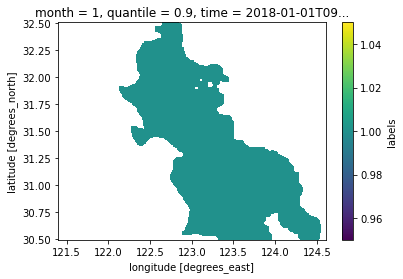

In [46]:
blobs.labels.isel(time=0).plot()

In [44]:
blobs

<xarray.Dataset>
Dimensions:   (lat: 201, lon: 321, time: 365)
Coordinates:
  * lat       (lat) float32 30.5 30.51 30.52 30.53 ... 32.47 32.48 32.49 32.5
  * lon       (lon) float32 121.4 121.4 121.4 121.4 ... 124.6 124.6 124.6 124.6
    month     (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12
    quantile  float64 0.9
  * time      (time) datetime64[ns] 2018-01-01T09:00:00 ... 2018-12-31T09:00:00
Data variables:
    labels    (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan